In [1]:
import pandas as pd
import re 
import csv

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
import dateutil.parser

In [3]:
data = pd.read_csv("rich_foia_master_filtered2.csv")

### duration is in days

### Filtered out where 

+ Closed date was TBD
+ Description that was empty string 
+ Description "under review"
+ All duplicate entries have been take out -- duplicates as noted as value_counts()

### bi-strict: only full grants count

### bi-gen: full and partial grants count


In [4]:
data.columns

Index(['Unnamed: 0', 'closed_date', 'data_submitted', 'date_submitted',
       'description', 'final_disposition', 'name', 'organization', 'tracking',
       'tracking number', 'url', 'request', 'request_no_greeting',
       'request_body', 'body_lowercase', 'char_count', 'word_count',
       'sen_count', 'avg_sen_len', 'closed_datetime', 'submitted_datetime',
       'duration', 'ref_foia', 'ref_fees', '_agency', 'phone_number',
       'hyperlink', 'email_address', 'ref_date', 'ref_place', 'readability',
       'ref_data', 'specificity', 'lemmatized_body', 'bi_strict', 'bi_gen'],
      dtype='object')

In [5]:
def what_year(x):
    return (str(x))[-4:]

In [6]:
def calc_duration_year(days):
    return round((days / 365))

In [7]:
data["year"] = data["date_submitted"].apply(what_year)

In [8]:
data["duration_in_years"] = data["duration"].apply(calc_duration_year)

In [116]:
def lookup_term(description, term):
    description = str(description).lower()
    if term in description:
        return 1
    else:
        return 0

In [10]:
data["_agency"].value_counts()

EPA     31060
DOC      1530
CBP      1200
DON       381
NARA      258
GSA        20
FLRA       10
DLA        10
MSPB        2
Name: _agency, dtype: int64

In [11]:
data["duration_in_years"].value_counts()

0    31500
1     2127
2      598
3      180
4       49
5       14
6        3
Name: duration_in_years, dtype: int64

## Appearances of the word "material" in the description

In [12]:
data['material presence'] = data['body_lowercase'].apply(lookup_term, args=("material",))

In [13]:
material_data = data[data['material presence'] == 1]

In [14]:
for item in material_data['description'].sample(30):
    print(item)
    print("------------------")

December 8, 2016 U.S. Environmental Protection Agency USEPA HEADQUARTERS William Jefferson Clinton Building 1200 Pennsylvania Ave., N.W. Mail Code: 1703A Washington, DC 20460 Re: U.S. EPA Asbestos Information Act FOIA Request To Whom It May Concern: I write to request copies of the following documents under the Freedom of Information Act: 1. The Asbestos Information Act, enacted October 10, 1988, required companies who manufactured asbestos-containing products to submit “the years of manufacture, the types or classes of product, and, to the extent available, other identifying characteristics reasonably necessary to identify or distinguish the asbestos or asbestos-containing material” to the Administrator of the EPA. There are also supporting documents that go along with their specifications, mentioned in Unit III of the AIA Federal Register. I would like these as well. I would like these documents to be in certified copies to be able to produce in admissible form under the Federal Rule

In [15]:
material_data['bi_strict'].value_counts()

0    3202
1    1502
Name: bi_strict, dtype: int64

Random sample of requests including the word "material" seem to often appear in the phrase "hazardous material" rather than in a situation where the requester is simply requesting "materials" related to a specific topic of interest. 

## Appearances of the word "block" in the description

In [16]:
data['block presence'] = data['body_lowercase'].apply(lookup_term, args=("block",))

In [17]:
block_data = data[data['block presence'] == 1]

In [18]:
for item in block_data['description'].sample(30):
    print(item)
    print("------------------")

Seeking any records on file relating to underground storage tanks, environmental investigations, environmental remediation activities, and any related NJDEP requests and approval documents (i.e. NFAs) involving the property located at: 377 Deans Rhode Hall Road, South Brunswick, NJ 08831. Block: 21.01, Lot: 39.021
------------------
450 Kings Highway, Middletown, NJ 07748
Block 825, Lot 2

Environmental records pertaining to hazardous waste discharge, hazardous waste storage, handling, or manufacturing, underground storage tanks, above ground storage tanks, leaking underground storage tanks, historic leaking underground storage tanks, environmental investigations or remediation conducted under EPA supervision, production/handling/release of polychlorinated biphenyls.
------------------
"All Phase I Environmental Site Assessment Info. " For: Monmouth Rubber – 75 Long Branch Avenue Owner: Long Branch Realty Co. c/o Monmouth Rubber Block 306, Lot 2 Vacant Land – 41 Long Branch Avenue Owne

In [19]:
block_data['bi_strict'].value_counts()

0    1830
1    1189
Name: bi_strict, dtype: int64

## Appearances of the word "property" in the description

In [20]:
data['property presence'] = data['body_lowercase'].apply(lookup_term, args=("property",))

In [21]:
property_data = data[data['property presence'] == 1]

In [22]:
for item in property_data['description'].sample(30):
    print(item)
    print("------------------")

Pursuant to the federal Freedom of Information Act, IES is requesting any documents the USEPA may have on file concerning current or historical plans; permits; current or historical underground or aboveground storage tanks; hazardous materials incidents; and any other environmental conditions, inspections, releases, or violations for the property located at 8810 West 191st Street in Mokena, Illinois 60448.
------------------
636 Brooklyn Avenue, Brooklyn, NY

Requesting any information regarding storage of toxic or hazardous materials, inspections, violations, sampling preformed on the property, permit, etc.
------------------
For this property: Kitchen Kompact, KITCHEN KOMPACT, INC, 911 E 11TH ST, Jeffersonville, IN Please provide any information regarding known environmental impacts, chemical or petroleum spills, underground storage tanks, aboveground storage tanks, soil or groundwater investigations, cleanups or remediation.
------------------
Pursuant to the federal Freedom of Info

In [23]:
property_data['bi_strict'].value_counts()

0    4669
1    2742
Name: bi_strict, dtype: int64

## Appearances of the word "lot" in the description

In [24]:
data['lot presence'] = data['body_lowercase'].apply(lookup_term, args=(" lot",))

In [25]:
lot_data = data[data['lot presence'] == 1]

In [26]:
for item in lot_data['description'].sample(30):
    print(item)
    print("------------------")

Ms. Wanda Calderon
Freedom of Information Officer					
USEPA Region 2
290 Broadway, 26th Floor
New York, New York 10007-1866

Re:	Freedom of Information Request
34 East 39th Street
New York, NY 10016 
	
			
Madam:

I am writing you under the provision of the New York Freedom of Information Law (Article 6, Public Officers Law) to request access to certain information available from your agency.  I would like to receive information regarding the known or potential environmental and public health hazards posed by the site located at the following address:

Tax Block, Lot	Address	Alternate Address(s)
Block 868, Lot 47	34 East 39th Street, New York, NY 10016	NA

Specifically, I would like to obtain:

•	A summary of any record of decision regarding investigation or clean up at the site;
•	Notification of the lead agency that is primarily responsible for investigating and cleaning up the site;
•	Notification of any legal action involving the site;
•	Detailed reports, monitoring data, regulato

In [27]:
lot_data['bi_strict'].value_counts()

0    1909
1    1229
Name: bi_strict, dtype: int64

## Appearances of the word "region" in the description

In [28]:
data['region presence'] = data['body_lowercase'].apply(lookup_term, args=("region",))

In [29]:
region_data = data[data['region presence'] == 1]

In [30]:
for item in region_data['description'].head(30):
    print(item)
    print("------------------")

copy of records on or after May 28, 2009 relating to The Mills Gap Groundwater Contamination Superfund Site, and The CTS of Asheville, Inc. Site, etc., as specified in request (forwarded from Region 4)
------------------
copy of records regarding SKEO, Inc. and E2 Inc. from 2006 to August 10, 2011 regarding the firm's work for US EPA in St. Louis, MO (partial transfer from Region 7 for response to item #3)
------------------
Requesting any and all documents pertaining to correspondence between any EPA Region 6 member and any members of the Oil and Gas Industry regarding air emissions in the Barnett Shale.
------------------
I would like to receive an electronic copy of the document the EPA, or EPA Region 10 specifically, sent to IDEQ (& likely all other Air Agencies), that would have likely/essentially "forwarded" the Tim Hanley and Adam Reff April 7, 2011 memo “Assessment of PM2.5 FEMs Compared to Collocated FRMs” and its 3 cited attachments to them. I need to also know the date it wa

In [31]:
region_data.shape

(2155, 43)

In [32]:
region_data['bi_strict'].value_counts()

1    1304
0     851
Name: bi_strict, dtype: int64

## Look at full grants only: strict

In [33]:
data_granted_strict = data[data["bi_strict"] == 1]

In [34]:
data_granted_strict.shape

(14609, 43)

In [35]:
data_granted_strict['phone_number'].value_counts()

0    9764
1    4845
Name: phone_number, dtype: int64

In [36]:
data_granted_strict["duration_in_years"].value_counts()

0    13760
1      630
2      154
3       48
4       11
5        6
Name: duration_in_years, dtype: int64

In [37]:
data.shape

(34471, 43)

## Look at full grants only: generous

In [38]:
data_granted_gen = data[data["bi_gen"] == 1]

In [39]:
data_granted_gen.shape

(17019, 43)

In [40]:
data_granted_gen['phone_number'].value_counts()

0    11736
1     5283
Name: phone_number, dtype: int64

In [41]:
data_granted_gen['final_disposition'].value_counts()

Full grant                      14609
Partial grant/partial denial     2410
Name: final_disposition, dtype: int64

## The best requesters

In [42]:
# list of all the requesters in the system
requesters = list(set(data_granted_strict["name"]))

In [43]:
number_of_all_request_by_requesters = data["name"].value_counts().to_dict()

In [44]:
# Dictionary of the total number of requests each requestor submitted
number_of_all_request_by_requesters

{'Paul A. Esquivel': 1,
 'Suzanne Bostrom': 1,
 'John Dudish': 1,
 'William A. Norris': 1,
 'Jason A. McIlwain': 5,
 'Robin Ledford': 3,
 'Caleb T. King': 1,
 'David Woodsmall': 1,
 'Geoffrey Gisler': 1,
 'Andrea M. Radtke': 52,
 "Sandy O'Kelley": 3,
 'Andrew Kleinhans': 2,
 'Linda Quintanilla': 1,
 'Andrea F. Chavarria': 1,
 'April A. McQuillar': 2,
 'Eric B. Dieck': 2,
 'Ryan Snodgrass': 1,
 'John T. Kolaga': 2,
 'Laura A. Brust': 2,
 'John Barth': 5,
 'Rachael E. Koss': 2,
 'Alexander Baumgartner': 5,
 'Eric Caubarreaux': 2,
 'Dawnine Martinez': 1,
 'Keith A. Magiera': 1,
 'Victor E. Covalt III': 1,
 'Chase Cammarota': 4,
 'Bruce E. Myers': 1,
 'Elizabeth Evanoff': 1,
 'John McLeod': 1,
 'Debra Abelson': 1,
 'Bryce A. Shepherd': 7,
 'Kyle Coombs': 1,
 'John T. Garcia': 1,
 'Stephanie Pollert': 19,
 'Christopher Lahiff': 2,
 'Matthew Wilson': 1,
 'Fred V. Lucas': 1,
 'Dr.\xa0\r\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\r\n\t\t\t\t\t\t\t\t\tBlair Smith': 1,
 'Joshua Fisher': 1,
 'Jacob Moore'

In [45]:
successful_requesters = data_granted_strict["name"].value_counts().to_dict()

In [46]:
# Creates a list of tuples that has:
    # Requestor name, number of successful requests, number of total requests, ratio between successful & total 
success_rates = []
for requester in requesters:
    
    success_rate = successful_requesters[requester] / number_of_all_request_by_requesters[requester]
    success_rates.append((requester, successful_requesters[requester], number_of_all_request_by_requesters[requester], success_rate))
    

In [47]:
success_rates

[('John Dudish', 1, 1, 1.0),
 ('Jason A. McIlwain', 4, 5, 0.80000000000000004),
 ('Robin Ledford', 3, 3, 1.0),
 ('Erik M. Sardich', 1, 3, 0.33333333333333331),
 ('Andrea M. Radtke', 35, 52, 0.67307692307692313),
 ("Sandy O'Kelley", 1, 3, 0.33333333333333331),
 ('Andrew Kleinhans', 2, 2, 1.0),
 ('Linda Quintanilla', 1, 1, 1.0),
 ('Eric B. Dieck', 2, 2, 1.0),
 ('Laura A. Brust', 1, 2, 0.5),
 ('Rachael E. Koss', 1, 2, 0.5),
 ('Keith A. Magiera', 1, 1, 1.0),
 ('Victor E. Covalt III', 1, 1, 1.0),
 ('Chase Cammarota', 2, 4, 0.5),
 ('Bruce E. Myers', 1, 1, 1.0),
 ('Bryce A. Shepherd', 7, 7, 1.0),
 ('Kyle Coombs', 1, 1, 1.0),
 ('Stephanie Pollert', 18, 19, 0.94736842105263153),
 ('Christopher Lahiff', 1, 2, 0.5),
 ('Jacob Moore', 1, 1, 1.0),
 ('Fred Trudwig Jr.', 2, 2, 1.0),
 ('Kevin Russell', 1, 1, 1.0),
 ('Dr.\xa0\r\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\r\n\t\t\t\t\t\t\t\t\tElaine P. Black',
  1,
  1,
  1.0),
 ('Jeremy Cohen', 1, 1, 1.0),
 ('Brian Werner', 1, 2, 0.5),
 ('Joseph Gavin', 3, 11, 0.

In [48]:
# Most successful: raw number of successful requests
sorted_successful_requesters = sorted(success_rates, key=lambda x: x[1])
sorted_successful_requesters[-20:]

[('Christopher M. Lahiff', 38, 46, 0.82608695652173914),
 ('Kresti A. Lyddon', 39, 40, 0.97499999999999998),
 ('Allison McCormick', 41, 48, 0.85416666666666663),
 ('Samuel G. Van Duyn', 41, 49, 0.83673469387755106),
 ('Rose Santos', 42, 209, 0.20095693779904306),
 ('Nick Bradley', 42, 47, 0.8936170212765957),
 ('Janine Gydus', 45, 51, 0.88235294117647056),
 ('Lindsey Sorensen', 45, 94, 0.47872340425531917),
 ('Paulina Do', 47, 57, 0.82456140350877194),
 ("Christy O'Connor", 53, 191, 0.27748691099476441),
 ('Lauren S. Hanna', 56, 122, 0.45901639344262296),
 ('James Cressy', 80, 148, 0.54054054054054057),
 ('Greg Oberlohr', 84, 121, 0.69421487603305787),
 ('Diana Lennon', 87, 221, 0.39366515837104071),
 ('Christian Ampuero', 96, 129, 0.7441860465116279),
 ('Kevin Bogardus', 97, 185, 0.5243243243243243),
 ('Donna M. Stanuikynas', 149, 210, 0.70952380952380956),
 ('Loren Alcantara', 151, 171, 0.88304093567251463),
 ('Robert H. Slater', 156, 166, 0.93975903614457834),
 ('Connie Marini', 211

## Folks who have been granted every FOIA request they've submitted

In [49]:
requesters_perf_score = [requester for requester in success_rates if requester[3] == 1 ]

In [50]:
(sorted(requesters_perf_score, key=lambda x: x[2]))[-20:]

[('Erica A. Doctor', 8, 8, 1.0),
 ('Tori Wardamasky', 8, 8, 1.0),
 ('Ashley Persaud', 8, 8, 1.0),
 ('Dr.\xa0\r\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\r\n\t\t\t\t\t\t\t\t\tBruce D. Riggle',
  8,
  8,
  1.0),
 ('Christopher M. Olsen', 8, 8, 1.0),
 ('Ena Forrester-Webster', 9, 9, 1.0),
 ('Bryan J. Telegin', 9, 9, 1.0),
 ('Amy Bauer', 9, 9, 1.0),
 ('Shannon Williamson', 9, 9, 1.0),
 ('Andrew D. Woods', 10, 10, 1.0),
 ('Cathleen Buzzetta', 10, 10, 1.0),
 ('Alexandria Snyder', 11, 11, 1.0),
 ('Clint Beccue', 11, 11, 1.0),
 ('Matthew Feinberg', 11, 11, 1.0),
 ('Debbie Davison', 11, 11, 1.0),
 ('Melissa M. Greenfield', 11, 11, 1.0),
 ('Luray Filiou', 14, 14, 1.0),
 ('Jim Geiger', 15, 15, 1.0),
 ('Kevin DiMartino', 15, 15, 1.0),
 ('Markus W. Brombacher', 19, 19, 1.0)]

**Markus W. Brombacher', 19, 19, 1.0**: submitted the highest number of requests while maintaining a perfect score.

In [51]:
# Requestors who have submitted more than 19 requests
requesters_more_than_one = [requester for requester in success_rates if requester[2] > 19 ]

In [52]:
(sorted(requesters_more_than_one, key=lambda x: x[3]))[-20:]

[('Allison McCormick', 41, 48, 0.85416666666666663),
 ('Garrett Haas', 18, 21, 0.8571428571428571),
 ('Nicolette S. Caravella', 30, 35, 0.8571428571428571),
 ('Shermin Haider', 32, 37, 0.86486486486486491),
 ('Carissa C. Ries', 26, 30, 0.8666666666666667),
 ('Richard L. Conn', 28, 32, 0.875),
 ('sholeh hashemkhani', 28, 32, 0.875),
 ('Matthew Spaeth', 22, 25, 0.88),
 ('Janine Gydus', 45, 51, 0.88235294117647056),
 ('Loren Alcantara', 151, 171, 0.88304093567251463),
 ('Nick Bradley', 42, 47, 0.8936170212765957),
 ('Jaqueline Sumski', 26, 29, 0.89655172413793105),
 ('Kim Roberts', 26, 29, 0.89655172413793105),
 ('Ruth Mannebach', 27, 30, 0.90000000000000002),
 ('Michael T. White', 22, 24, 0.91666666666666663),
 ('Charlene A. Vondett', 34, 37, 0.91891891891891897),
 ('Brian Hacker', 28, 30, 0.93333333333333335),
 ('Robert H. Slater', 156, 166, 0.93975903614457834),
 ('Neil F. Inglis', 19, 20, 0.94999999999999996),
 ('Kresti A. Lyddon', 39, 40, 0.97499999999999998)]

**Kresti A. Lyddon', 39, 40, 0.97499999999999998** maintains the best score if we look at folks who submitted more than Perfect-Scorer-Max's 19 requests.

In [53]:
# Requestors who have submitted more than 40 requests
requesters_more_than_Lyddon = [requester for requester in success_rates if requester[2] > 40 ]

In [54]:
(sorted(requesters_more_than_Lyddon, key=lambda x: x[3]))[-20:]

[('Danielle M. McLaughlin', 31, 51, 0.60784313725490191),
 ('Scott F. Narod', 28, 43, 0.65116279069767447),
 ("Michael O'Boyle", 30, 45, 0.66666666666666663),
 ('Andrea M. Radtke', 35, 52, 0.67307692307692313),
 ('Greg Oberlohr', 84, 121, 0.69421487603305787),
 ('Donna M. Stanuikynas', 149, 210, 0.70952380952380956),
 ('Don Hennenfent', 30, 41, 0.73170731707317072),
 ('Christian Ampuero', 96, 129, 0.7441860465116279),
 ('ann m. land', 33, 43, 0.76744186046511631),
 ('Tony Herber', 35, 45, 0.77777777777777779),
 ('Alexandra Konspore', 36, 45, 0.80000000000000004),
 ('Paulina Do', 47, 57, 0.82456140350877194),
 ('Christopher M. Lahiff', 38, 46, 0.82608695652173914),
 ('Connie Marini', 211, 255, 0.82745098039215681),
 ('Samuel G. Van Duyn', 41, 49, 0.83673469387755106),
 ('Allison McCormick', 41, 48, 0.85416666666666663),
 ('Janine Gydus', 45, 51, 0.88235294117647056),
 ('Loren Alcantara', 151, 171, 0.88304093567251463),
 ('Nick Bradley', 42, 47, 0.8936170212765957),
 ('Robert H. Slater',

**Robert H. Slater', 156, 166, 0.93975903614457834**: more requests than Lyddon, but slightly lower score.

In [55]:
# Requestors who have submitted more than 166 requests
requesters_more_than_Slater = [requester for requester in success_rates if requester[2] > 166 ]

In [56]:
(sorted(requesters_more_than_Slater, key=lambda x: x[3]))[-20:]

[('Kristine Savona', 38, 563, 0.067495559502664296),
 ('Jennifer Rovzar', 28, 217, 0.12903225806451613),
 ('Rose Santos', 42, 209, 0.20095693779904306),
 ("Christy O'Connor", 53, 191, 0.27748691099476441),
 ('Diana Lennon', 87, 221, 0.39366515837104071),
 ('Kevin Bogardus', 97, 185, 0.5243243243243243),
 ('Donna M. Stanuikynas', 149, 210, 0.70952380952380956),
 ('Connie Marini', 211, 255, 0.82745098039215681),
 ('Loren Alcantara', 151, 171, 0.88304093567251463)]

## Requests that the agency labeled as "Records not reasonably described"

In [57]:
records_not_described = data[data["final_disposition"] == "Records not reasonably described"]

In [58]:
for item in records_not_described["description"].sample(30):
    print(item)
    print(" ------------------- ")

Request is being completed as part of a Phase I ESA.  We request all records pertaining to 21-10 44th Drive, LOng ISland City, New York (Block 00078, Lot 0052)
 ------------------- 
Dear Records Management Officer:

(1)	Please email the following records if possible:

Tetra Tech Inc. (Tetra Tech) is conducting a Phase I Environmental Site Assessment (ESA) at City of Rome, Tannery Road Landfill, Rome, NY.  This investigation is being conducted in order to identify evidence of any recognized environmental conditions (REC) that may have an adverse environmental impact upon the subject property.  Tetra Tech is requesting any records you may have concerning the property of interest.  Any assistance from your office would be greatly appreciated.  

(2)	If all the requested records cannot be emailed to me, please inform me by email of the portions that can be emailed and advise me of the cost for reproducing the remainder of the records requested ($0.25 per page or actual cost of reproduction

In [59]:
records_not_described["_agency"].value_counts().sort_values(ascending=False)

EPA     326
DOC      31
DON      16
CBP      10
NARA      8
GSA       2
MSPB      1
Name: _agency, dtype: int64

## Granted requests over the years

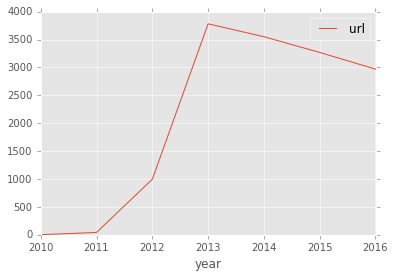

In [60]:
ax = data_granted_strict.groupby(by=['year']).count().plot(y='url')
ax

## EPA: granted requests

In [61]:
epa_granted_strict = data_granted_strict[data_granted_strict["_agency"] == "EPA"]

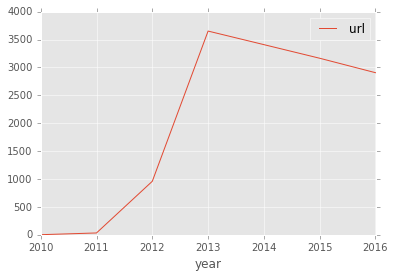

In [62]:
ax1 = epa_granted_strict.groupby(by=['year']).count().plot(y='url')
ax1

In [63]:
epa_granted_strict["duration_years"] = epa_granted_strict['duration'].apply(calc_duration_year)

/usr/local/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [64]:
epa_granted_strict['duration_years'].value_counts()

0    13345
1      584
2      140
3       40
4        8
5        5
Name: duration_years, dtype: int64

In [65]:
forever_but_granted_epa = epa_granted_strict[epa_granted_strict['duration_years'] == 5]

In [66]:
for item in forever_but_granted_epa["description"]:
    print(item)
    print("_______________")

Requesting MRID 472378002 Mileson, B.E. 2007. Biochemical Pesticide Data Required for Zerotol 2.0. Submitted by BioSafeSystems LLC.
_______________
Request documents re: JABCO Manufacturing's product Herpicide Spray (48920-1): protocols, meeting notes, DERs, etc.
_______________
Interpretive guidance for 40 C.F.R. 159.165(b)(4) reporting reqs, FIFRA 12(a)(1)(B) definition of unlawful advertising/promotional/other claims
_______________
Requesting records of 1) all incidents of poisoning of domestic animals by the sodium flouroacetate Compound 1080 livestock protection collar; 2) all incidents of poisoning of domestic animals by the sodium cyanide M-44; 3) all incidents of poisoning of non-target wildlife by the sodium flouroacetate Compound 1080 livestock protection collar; 4) all incidents of poisoning of non-target wildlife by the sodium cyanide M-44; 5) all incidents in which humans were or were thought to have been affected by exposure to the sodium flouroacetate Compound 1080 live

In [67]:
for item in forever_but_granted_epa["name"]:
    print(item)
    print("_______________")

William Stoneman
_______________
Ann Kline
_______________
Carolyn Wagner
_______________
Maggie Brasted
_______________
Aaron Colangelo
_______________


# Term: "public concern"

In [68]:
data['public concern'] = data['body_lowercase'].apply(lookup_term, args=("public concern",))

In [69]:
public_concern_data = data[data['public concern'] == 1]

In [70]:
for item in public_concern_data['description']:
    print(item)
    print("------------------")

copy of records from the public concerning the adequacy of EPA's efforts to control weed resistance specific to the use of Glyphosate
------------------
1150 15TH  STREET N. W.
WASHINGTON, D.C. 20071-7403
(202) 334-6000



									March 7, 2014


Chief Privacy Officer/Chief FOIA Officer
The Privacy Office
U.S. Department of Homeland Security
US Customs and Border Protection

To whom it may concern:

This is a request for records under the Freedom of Information Act, 5 U.S.C. §§ 552 et seq., submitted on behalf of The Washington Post.

This request regards Customs and Border Protections’ use of unmanned aerial vehicles. 

We are requesting documents relating to any investigation, complaints or reports of abuse by CBP personnel in the operation of drones, to include improper surveillance of individuals who are not legitimate targets or suspects. Such individuals may include girlfriends or civilians who are not under any suspicion of criminal wrongdoing.

We are requesting expedited proc

In [71]:
public_concern_data['bi_strict'].value_counts()

0    5
Name: bi_strict, dtype: int64

In [72]:
public_concern_data['final_disposition'].value_counts()

Undetermined         3
Request withdrawn    1
No records           1
Name: final_disposition, dtype: int64

# Reporters Committee for Freedom of the Press - FOIA Letter Generator


http://www.rcfp.org/foia

In [73]:
# "If my request is denied in whole or part, I ask that you justify all deletions by reference to specific exemptions of the act.

In [74]:
data['rcfp lang'] = data['body_lowercase'].apply(lookup_term, args=("If my request is denied in whole or part",))

In [75]:
rcfp_lang_data = data[data['rcfp lang'] == 1]

In [76]:
for item in rcfp_lang_data['description']:
    print(item)
    print("------------------")

In [77]:
rcfp_lang_data['final_disposition'].value_counts()

Series([], Name: final_disposition, dtype: int64)

In [78]:
epa_granted_strict["name"].value_counts()

Connie Marini             211
Robert H. Slater          156
Loren Alcantara           151
Donna M. Stanuikynas      149
Christian Ampuero          96
Kevin Bogardus             96
Diana Lennon               87
Greg Oberlohr              84
James Cressy               80
Lauren S. Hanna            56
Christy O'Connor           53
Paulina Do                 47
Janine Gydus               45
Lindsey Sorensen           45
Nick Bradley               42
Allison McCormick          41
Samuel G. Van Duyn         41
Kresti A. Lyddon           39
Kristine Savona            38
Christopher M. Lahiff      38
Alexandra Konspore         36
Tony Herber                35
Andrea M. Radtke           35
Charlene A. Vondett        34
Alexis L. Haynes           34
ann m. land                33
Shermin Haider             32
Joseph P. Gavin            31
Danielle M. McLaughlin     31
Michael O'Boyle            30
                         ... 
Coleen Devorak              1
Barry Cohen                 1
Cory Hoefe

In [81]:
slater = epa_granted_strict[epa_granted_strict["name"] == "Robert H. Slater"]

In [82]:
slater.head()

,Unnamed: 0,closed_date,data_submitted,date_submitted,description,final_disposition,name,organization,tracking,tracking number,...,bi_strict,bi_gen,year,duration_in_years,material presence,block presence,property presence,lot presence,region presence,duration_years
1391,1457,Mon Jul 22 16 22 05 EDT 2013,NaN,Thu Jun 20 20 09 07 EDT 2013,"Pursuant to the Freedom of Information Act, R...",Full grant,Robert H. Slater,"Roth Environmental Consultants, Inc.",NaN,EPA-R7-2013-007569,...,1,1,2013,0,0,0,1,0,0,0
2160,2281,Fri Jun 28 10 40 59 EDT 2013,NaN,Thu May 30 14 55 44 EDT 2013,"Pursuant to the Freedom of Information Act, R...",Full grant,Robert H. Slater,"Roth Environmental Consultants, Inc.",NaN,EPA-R7-2013-006874,...,1,1,2013,0,0,0,0,0,0,0
2241,2367,Tue Jul 09 17 13 39 EDT 2013,NaN,Thu Jun 06 18 56 17 EDT 2013,"Pursuant to the Freedom of Information Act, R...",Full grant,Robert H. Slater,"Roth Environmental Consultants, Inc.",NaN,EPA-R7-2013-007147,...,1,1,2013,0,0,0,0,0,0,0
2291,2418,Thu Sep 26 12 45 18 EDT 2013,NaN,Tue Aug 27 15 28 23 EDT 2013,"Pursuant to the Freedom of Information Act, R...",Full grant,Robert H. Slater,"Roth Environmental Consultants, Inc.",NaN,EPA-R7-2013-009450,...,1,1,2013,0,0,0,0,0,0,0
2476,2612,Thu Sep 26 12 47 44 EDT 2013,NaN,Tue Aug 27 19 51 58 EDT 2013,"Pursuant to the Freedom of Information Act, R...",Full grant,Robert H. Slater,"Roth Environmental Consultants, Inc.",NaN,EPA-R7-2013-009461,...,1,1,2013,0,0,0,0,0,0,0


In [83]:
best_slater = slater[(slater["specificity"] == 10) & (slater["readability"] > 13)]

In [84]:
for description in best_slater["description"]:
    print(description)
    print("________________")

Pursuant to the Freedom of Information Act,  Roth Environmental Consultants, Inc. is requesting written information or copies of records pertaining to any reported environmental problems of a hazardous or toxic nature that may have occurred at, or in the vicinity of, the property referenced below.

Office/Warehouse
1300-1348 Quebec Street
North Kansas City, Missouri 64116

File Number 033-P1-2013.001

Our request includes, but is not limited to, information pertaining to the National Priority List (NPL), Comprehensive Environmental Response, Compensation and Liability Information System (CERCLIS), Hazardous Waste Date Management System (HWDMS), and any reported problems in water, air and hazardous spills.

This request does not include information regarding storage tanks or PCBs.

If you have any questions, please give me a call.  Thank you for your assistance.
________________
Pursuant to the Freedom of Information Act,  Roth Environmental Consultants, Inc. is requesting written infor

In [85]:
# bad_slater = data[(data["specificity"] == 10) & (data["readability"] > 13) & (data["name"] == "Robert H. Slater") & (data["bi_strict"] == 0)]

bad_slater = data[(data["name"] == "Robert H. Slater") & (data["bi_strict"] == 0)]

In [86]:
for description in bad_slater["description"]:
    print(description)
    print("________________")

Pursuant to the Freedom of Information Act,  Roth Environmental Consultants, Inc. is requesting written information or copies of records pertaining to any reported environmental problems of a hazardous or toxic nature that may have occurred at, or in the vicinity of, the property referenced below.

The Crossings Retail Center
2108-2118 Clemson Road
Columbia, South Carolina 66213

Our request includes, but is not limited to, information pertaining to the National Priority List (NPL), Comprehensive Environmental Response, Compensation and Liability Information System (CERCLIS), Hazardous Waste Date Management System (HWDMS), and any reported problems in water, air and hazardous spills.

This request does not include information regarding storage tanks or PCBs.

If you have any questions, please give me a call.  Thank you for your assistance.
________________
Pursuant to the Freedom of Information Act,  Roth Environmental Consultants, Inc. is requesting written information or copies of re

In [87]:
bad_gen = data[(data["specificity"] < 10) & (data["readability"] < 13) & (data["bi_strict"] == 0)]
bad_gen.shape

(6186, 45)

In [88]:
for description in bad_gen["description"].sample(20):
    print(description)
    print("________________")

The Guardian is doing a FOIA request for all e-mails related to Flint drinking water and EPA. I request that this be posted online electronically, or if not, that I will also be sent a copy of this information. I intend to process and post this on my website FLINTWATERSTUDY.org I am not requesting any work or documents beyond those requested by other groups.
________________
I am looking for all available files regarding the RSR Corp Superfund Site (EPA ID# TXD079348397). Please see the attached FOIA Request specifics.
________________
ANY AN ALL RECORDS BUT NO LIMITED TO VOLUNTARY REMOVALS, DEPORTATIONS, DEPARTURES THAT YOU MAY HAVE ON FILE.
________________
Honeywell has identified at least one technical document not included in the first tranche that, if you have a copy, we would like to ensure we receive as soon as possible. The document is a 1989 Beaver Engineering Environmental Assessment Report for the site and is referenced in several of the other technical documents sent. Does

In [89]:
bad_gen["final_disposition"].value_counts()

No records                                3400
Partial grant/partial denial               872
Request withdrawn                          681
Duplicate request                          260
Undetermined                               182
Records not reasonably described           179
Improper FOIA request for other reason     145
Not an agency record                       141
Other                                      112
Fee-related reason                          98
Full denial based on exemptions             80
All records referred to another agency      36
Name: final_disposition, dtype: int64

In [90]:
for item in bad_gen[bad_gen["final_disposition"] == "Improper FOIA request for other reason"]["description"].sample(15):
    print(item)
    print("________________")

I am requesting copies of the contact information for all employees who have purchase cards within the Department of Commerce.

If there are any fees for searching or copying the records, please let me know before you fill my request. 

If you deny all or any part of this request, please cite each specific exemption you think justifies your withholding of information. Notify me of appeal procedures available under the law. 

Sincerely,

Stephanie Bruhn
42302 Shoover Sq.
Chantilly, VA 20152
________________
ALL   MY  CBP RECORDS  AND DOCUMENTS IF  ANY
________________
Guide to Federal Records
________________
Re: the bus loads of immigrants legally allowed into the country...
What are their ages, sex, and a list of the countries they come from.
________________
On behalf of first party request for any and all documents with PII
________________
Please provide us with all records maintained by your office.  Specifically, please provide records from possible border stop in or around 2008 

In [91]:
for item in bad_gen[bad_gen["final_disposition"] == "Records not reasonably described"]["description"].sample(15):
    print(item)
    print("________________")

Vesey Delivery Service at 225 Long Avenue, Building 15, Hillside, Union County, NJ 07205 NJD986639425
________________
I am looking for any applicable record that might apply to me. Anything by the way cant remember officially what I might have signed or been involved with. I don't explicitly have a unique identifier that I can key on.
________________
Files pertaining to the former Airwork Corporation facility located at 2325 New Hyde Park Road, New Hyde Park, Nassau County, New York 11042 (Site ID No. 0201987 / EPA ID No. NYD980532113).
________________
Seeking to obtain any files, records or any information not limited to that which was stated, for PERRY BARBER JR. Thank You For Your Time.
________________
Copies of any and all documents pertaining to Roman Asphalt 14 Ogden Street, Newark, NJ
________________
My name is Jason DeYoung and I would like to make the following FOIA request.

Under the Freedom of Information Act, I am requesting access to all facilities that have been ins

In [92]:
# Markus W. Brombacher
good_brombacher = data[(data["specificity"] > 10) & (data["readability"] > 13) & (data["name"] == "Markus W. Brombacher") & (data["bi_strict"] == 1)]
good_brombacher.shape

(19, 45)

In [93]:
for item in good_brombacher["description"]:
    print(item)
    print("________________")

Dear Sir or Madam:

This is a request pursuant to the Freedom of Information Act (“FOIA”), 5 U.S.C. § 552, et seq.  We seek copies of any and all documents, including but not limited to correspondence, internal memoranda, reports, notes, records or other materials in the Environmental Protection Agency’s (“EPA’s”) pesticide registration files for the following Dithiopyr pesticide product: 

53883-208  (Control Solutions).
    
We would appreciate it if EPA would give priority to the following documents and provide them to us under separate cover as soon as they have cleared EPA’s Confidential Business Information review:  

1.	any submission/application correspondence with EPA;
2.	any EPA Form 8570-1 (Application for Pesticide – Section 1);
3.	any EPA Form 8579-34 (Certification with Respect to Citation of Data);
4.	any EPA Form 8570-35 (Data Matrix); and
5.	any EPA Form 8570-27 (Formulator’s Exemption Statement).

This request does not apply to any documents or portions thereof contai

In [94]:
region_good = region_data[(region_data["specificity"] > 10) & (region_data["readability"] > 13) & (region_data["bi_strict"] == 1)]
region_good.shape

(464, 43)

In [95]:
for item in region_good["description"].sample(20):
    print(item)
    print("________________")

Current digital listing of all EPA registered FIFRA Section 7 domestic and foreign pesticide producing establishments, sorted numerically by establishment number, name, site addresses and status code for 2010 to the most current reporting year , preferably in Excel, Access, DBF or Tab Delimited Text Format.  The latest reporting year I have from the U.S. EPA is dated 2009 (HQ-FOI-00269-11), which included two excel spreadsheets: 
First Excel file= “Pesticide Search Foreign and Domestic Establishments” with the following fields:  Reporting Year, Region, Product Registration #, Product Name, Product Name, Product Market, Product Type, Product Classification, Market Type, RUP Status, Estab. Number, Estab. Name, Estab. Site Address, Estab Site City, Estab Site State, Estab Site Zip Code, Estab Site County
Second Excel file= “Active Establishment Listing- Foreign and Domestic Establishments” with the following fields:
Estab Number, Estab Name, Estab Site Address, Estab Site City, Estab Site

# Frequently appearing organizations

In [96]:
data["organization"].value_counts().sort_values(ascending=False)

Whitestone Associates, Inc.                  326
ERM                                          316
Illinois State Geological Survey             269
Impact Environmental                         258
Weaver Consultants Group                     257
Brinkerhoff Environmental Services, Inc.     249
EDR, Inc                                     238
JM Sorge, Inc.                               232
PM Environmental                             223
DAI Environmental, Inc.                      219
REPSG, Inc.                                  219
BBJ Group                                    208
Atlantic Environmental Solutions, Inc.       188
E&E; News                                    182
ECC, Inc.                                    171
Roth Environmental Consultants, Inc.         163
IES                                          154
FOIA GROUP INC                               151
Cider Environmental                          148
Langan Engineering                           146
BB&J;               

In [97]:
data_granted_strict["organization"].value_counts().sort_values(ascending=False)

Illinois State Geological Survey                                 203
EDR, Inc                                                         199
REPSG, Inc.                                                      154
Roth Environmental Consultants, Inc.                             153
ECC, Inc.                                                        151
PM Environmental                                                 129
Whitestone Associates, Inc.                                      121
ERM                                                              103
Impact Environmental                                             102
E&E; News                                                         96
JM Sorge, Inc.                                                    93
ERS                                                               89
Environmental Operations                                          86
Cider Environmental                                               80
Exponent                          

In [101]:
epa_granted_strict["organization"].value_counts().sort_values(ascending=False)[:100]

Illinois State Geological Survey                                    203
EDR, Inc                                                            199
REPSG, Inc.                                                         154
Roth Environmental Consultants, Inc.                                153
ECC, Inc.                                                           151
PM Environmental                                                    129
Whitestone Associates, Inc.                                         121
ERM                                                                 103
Impact Environmental                                                102
E&E; News                                                            96
JM Sorge, Inc.                                                       93
ERS                                                                  89
Environmental Operations                                             86
Cider Environmental                                             

In [117]:
data['news_orgs'] = data['organization'].apply(lookup_term, args=("news",))

In [118]:
maybe_news_orgs = data[data['news_orgs'] == 1]

In [119]:
maybe_news_orgs["organization"].value_counts().sort_values(ascending=False)

E&E; News                                          182
MuckRock News                                       68
BuzzFeed News                                       14
Bloomberg News                                      11
The Dallas Morning News                              9
Daily Caller News Foundation                         7
The Hill newspaper                                   6
San Antonio Express-News                             5
ABC News                                             5
InsideClimate News                                   4
Dallas Morning News                                  3
CBS News                                             3
KTAB/KRBC News                                       3
The Corpus Christi Caller-Times (Newspaper)          3
KVOA News 4                                          3
VICE News                                            3
Kane republican newspaper                            3
High Country News                                    3
Reuters Ne

# A better function for finding news orgs

In [132]:
def is_this_news(description):
    
    newsy_names = ["news", "times", "post", "herald", "tribute", "magazine", "media", "courier", ]
    description = str(description).lower()
    
    news = 0
    
    for item in newsy_names:
        if item in description:
            news = 1
            break
        else:
            continue
            
    return news

In [134]:
data['news_orgs_better'] = data['organization'].apply(is_this_news)

In [135]:
most_news_orgs = data[data['news_orgs_better'] == 1]

In [136]:
most_news_orgs["organization"].value_counts().sort_values(ascending=False)

E&E; News                                              182
MuckRock News                                           68
BuzzFeed News                                           14
The Huffington Post                                     13
Bloomberg News                                          11
new york post                                           10
The Dallas Morning News                                  9
Daily Caller News Foundation                             7
The Hill newspaper                                       6
San Antonio Express-News                                 5
Washington Post                                          5
The New York Times                                       5
ABC News                                                 5
Federal Times                                            4
Remediation Technologies, Ltd.                           4
InsideClimate News                                       4
Los Angeles Times                                       

In [137]:
most_news_orgs["bi_strict"].value_counts()

0    356
1    196
Name: bi_strict, dtype: int64

# Sucessful news organizations

In [138]:
orgs = list(set(most_news_orgs["organization"]))

In [140]:
total_requests_by_organizations = data["organization"].value_counts().to_dict()

In [141]:
successful_orgs = data_granted_strict["organization"].value_counts().to_dict()

In [150]:
org_success_rates = []
for org in orgs:
    
    success_rate = successful_orgs.get(org, 0) / total_requests_by_organizations[org]
    org_success_rates.append((org, successful_orgs.get(org, 0), total_requests_by_organizations[org], success_rate))
    

In [152]:
sorted_successful_orgs = sorted(org_success_rates, key=lambda x: x[1])
sorted_successful_orgs[-20:]

[('The Scranton Times-Tribune', 1, 3, 0.33333333333333331),
 ('WOAI News4 San Antonio', 1, 1, 1.0),
 ('Global News', 1, 2, 0.5),
 ('ZAP Legislative Courier Service', 1, 1, 1.0),
 ('DCAutoGeek.com (media)', 1, 1, 1.0),
 ('KECI News (NBC)', 1, 1, 1.0),
 ('Gloucester Daily Times', 2, 2, 1.0),
 ('Investigative Post, Niagara Gazette, WGRZ-Channel 2',
  2,
  3,
  0.66666666666666663),
 ('Federal Times', 2, 4, 0.5),
 ('Penn Environmental & Remediation', 2, 2, 1.0),
 ('The Hill newspaper', 2, 6, 0.33333333333333331),
 ('The Dallas Morning News', 2, 9, 0.22222222222222221),
 ('InsideClimate News', 2, 4, 0.5),
 ('Bloomberg News', 2, 11, 0.18181818181818182),
 ('New York Post', 3, 3, 1.0),
 ('The Huffington Post', 3, 13, 0.23076923076923078),
 ('The New York Times', 4, 5, 0.80000000000000004),
 ('BuzzFeed News', 6, 14, 0.42857142857142855),
 ('MuckRock News', 13, 68, 0.19117647058823528),
 ('E&E; News', 96, 182, 0.52747252747252749)]

In [153]:
sorted(org_success_rates, key=lambda x: x[3])

[('Los Angeles Times', 0, 4, 0.0),
 ('Muckrock News', 0, 1, 0.0),
 ('The News Leader', 0, 2, 0.0),
 ('KVOA News 4', 0, 3, 0.0),
 ('Reuter News', 0, 1, 0.0),
 ('NYC News Service', 0, 1, 0.0),
 ('CNS News', 0, 1, 0.0),
 ('The News Journal Co.  (Gannett, Inc.)', 0, 1, 0.0),
 ('Energy News Today, Inc.', 0, 1, 0.0),
 ('Cable News Network (CNN)', 0, 1, 0.0),
 ('Tonawanda News', 0, 1, 0.0),
 ('The Fox News Channel', 0, 2, 0.0),
 ('San Antonio Express-News', 0, 5, 0.0),
 ('Asheville Citizen-Times', 0, 1, 0.0),
 ('KOKI-FOX23 News', 0, 1, 0.0),
 ('Avery, Dooley, Post, & Avery, LLP', 0, 1, 0.0),
 ('The Columbian newspaper', 0, 1, 0.0),
 ('The Post & Email', 0, 2, 0.0),
 ('The Washington Post', 0, 1, 0.0),
 ('NY Times', 0, 1, 0.0),
 ('Stephens Media', 0, 1, 0.0),
 ('Hakai Magazine', 0, 1, 0.0),
 ('KOIN6 News', 0, 1, 0.0),
 ('Reuters News', 0, 2, 0.0),
 ('Huffington Post', 0, 1, 0.0),
 ('Center for Media and Democracy', 0, 1, 0.0),
 ('Financial Times', 0, 1, 0.0),
 ('NEW YORK TIMES', 0, 1, 0.0),
 (

In [154]:
sorted(org_success_rates, key=lambda x: x[2])

[('Post Mountain Fire Department', 1, 1, 1.0),
 ('Muckrock News', 0, 1, 0.0),
 ('Vice Media Inc.', 1, 1, 1.0),
 ('Reuter News', 0, 1, 0.0),
 ('media/usofarn.com', 1, 1, 1.0),
 ('NYC News Service', 0, 1, 0.0),
 ('Fox News Channel', 1, 1, 1.0),
 ('CNS News', 0, 1, 0.0),
 ('The News Journal Co.  (Gannett, Inc.)', 0, 1, 0.0),
 ('Energy News Today, Inc.', 0, 1, 0.0),
 ('Cable News Network (CNN)', 0, 1, 0.0),
 ('Bay news 9', 1, 1, 1.0),
 ('Media Trackers', 1, 1, 1.0),
 ('Tonawanda News', 0, 1, 0.0),
 ('The News Tribune', 1, 1, 1.0),
 ('Asheville Citizen-Times', 0, 1, 0.0),
 ('KOKI-FOX23 News', 0, 1, 0.0),
 ('Sprott, Rigby, Newsom, Robbins & Lunceford P.C.', 1, 1, 1.0),
 ('The (Louisville) Courier-Journal', 1, 1, 1.0),
 ('Avery, Dooley, Post, & Avery, LLP', 0, 1, 0.0),
 ('The Columbian newspaper', 0, 1, 0.0),
 ('The Washington Post', 0, 1, 0.0),
 ('NY Times', 0, 1, 0.0),
 ('Stephens Media', 0, 1, 0.0),
 ('Hakai Magazine', 0, 1, 0.0),
 ('KOIN6 News', 0, 1, 0.0),
 ('Huffington Post', 0, 1, 0.0)

In [155]:
sorted(org_success_rates, key=lambda x: x[1])

[('Los Angeles Times', 0, 4, 0.0),
 ('Muckrock News', 0, 1, 0.0),
 ('The News Leader', 0, 2, 0.0),
 ('KVOA News 4', 0, 3, 0.0),
 ('Reuter News', 0, 1, 0.0),
 ('NYC News Service', 0, 1, 0.0),
 ('CNS News', 0, 1, 0.0),
 ('The News Journal Co.  (Gannett, Inc.)', 0, 1, 0.0),
 ('Energy News Today, Inc.', 0, 1, 0.0),
 ('Cable News Network (CNN)', 0, 1, 0.0),
 ('Tonawanda News', 0, 1, 0.0),
 ('The Fox News Channel', 0, 2, 0.0),
 ('San Antonio Express-News', 0, 5, 0.0),
 ('Asheville Citizen-Times', 0, 1, 0.0),
 ('KOKI-FOX23 News', 0, 1, 0.0),
 ('Avery, Dooley, Post, & Avery, LLP', 0, 1, 0.0),
 ('The Columbian newspaper', 0, 1, 0.0),
 ('The Post & Email', 0, 2, 0.0),
 ('The Washington Post', 0, 1, 0.0),
 ('NY Times', 0, 1, 0.0),
 ('Stephens Media', 0, 1, 0.0),
 ('Hakai Magazine', 0, 1, 0.0),
 ('KOIN6 News', 0, 1, 0.0),
 ('Reuters News', 0, 2, 0.0),
 ('Huffington Post', 0, 1, 0.0),
 ('Center for Media and Democracy', 0, 1, 0.0),
 ('Financial Times', 0, 1, 0.0),
 ('NEW YORK TIMES', 0, 1, 0.0),
 (

# Contains links

In [107]:
data[data['hyperlink'] == 1].shape

(476, 45)

In [109]:
data_granted_strict[data_granted_strict['hyperlink'] == 1].shape

(251, 43)